
**[Big Mart Sales Prediction Analysis](https://www.canva.com/design/DAFA4D_3e0o/gWO5wLlYKyplBo5x73ddvg/view?utm_content=DAFA4D_3e0o&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink)**


# Load Dataset

In [ ]:
!pip install dalex
!pip install scikit-plot
!pip install shap

     |████████████████████████████████| 1.0 MB 8.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=a272b53ae558a8fee132f290a193e63768ea021c8b471224dbc1114dcdb6ac4a
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 564 kB 7.1 MB/s 


In [ ]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import dalex as dx
import scikitplot as skplt
import shap
from pandas.testing import assert_frame_equal
from sklearn import metrics
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]
import warnings
warnings.filterwarnings(action="ignore")
warnings.filterwarnings('always')

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


# Understanding Dataset

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Certain features of each product and store have also been defined. The purpose is to create a predictive model and evaluate the sales of each product in a specific store. Using this model, BigMart will use this model to try to understand the properties of products and stores that are significant in improving sales.


* Item_Identifier : Unique product ID

* Item_Weight : Weight of product

* Item_Fat_Content : Whether the product is low fat or not

* Item_Visibility : The % of total display area of all products in a store allocated to the particular product

* Item_Type : The category to which the product belongs

* Item_MRP : Maximum Retail Price (list price) of the product

* Outlet_Identifier : Unique store ID

* Outlet_Establishment_Year : The year in which store was established

* Outlet_Size : The size of the store in terms of ground area covered

* Outlet_Location_Type : The type of city in which the store is located

* Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales : Sales of the product in the particular store.


# Import Dataset

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [ ]:
test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.

In [ ]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

We have same missing values percentage of Item Size and Outlet Size columns as that of in Test set.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
categoric = train.select_dtypes(include =[np.object])
print("Categorical Features in Data Set:",categoric.shape[1])

numeric= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Data Set:",numeric.shape[1])

Categorical Features in Data Set: 7
Numerical Features in Data Set: 5


`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
categoric = test.select_dtypes(include =[np.object])
print("Categorical Features in Data Set:",categoric.shape[1])

numeric = test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Data Set:",numeric.shape[1])

Categorical Features in Data Set: 7
Numerical Features in Data Set: 4


`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Basic Data Cleaning

## 1. Item Weight

In [ ]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(1463, 976)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


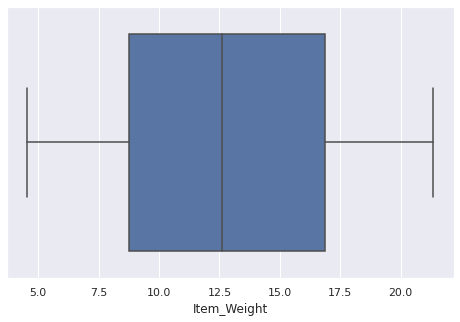

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


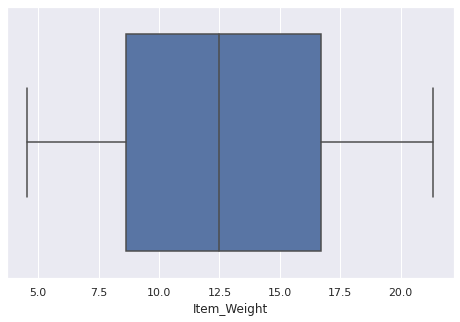

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

In [ ]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [ ]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Item_Weight.

## 2. Outlite Size

In [ ]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [ ]:
print(train['Outlet_Size'].value_counts())
print('#####################################')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
#####################################
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [ ]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [ ]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Outlet_Size

# Exploratory Data Analysis

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to fix them

In [ ]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [ ]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

In [ ]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)


## Univariate analysis

In [ ]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Years_Established'],
      dtype='object')

### 1. Item Fat Content

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


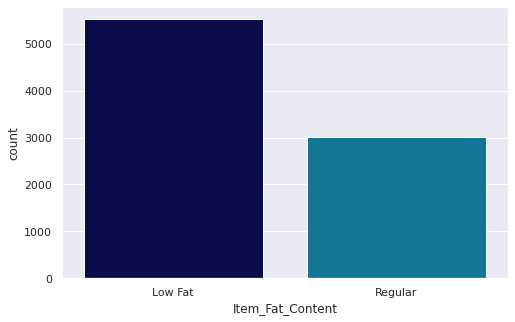

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

Observations:
The Items bought are more of Low Fat.

### 2. Item Type

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


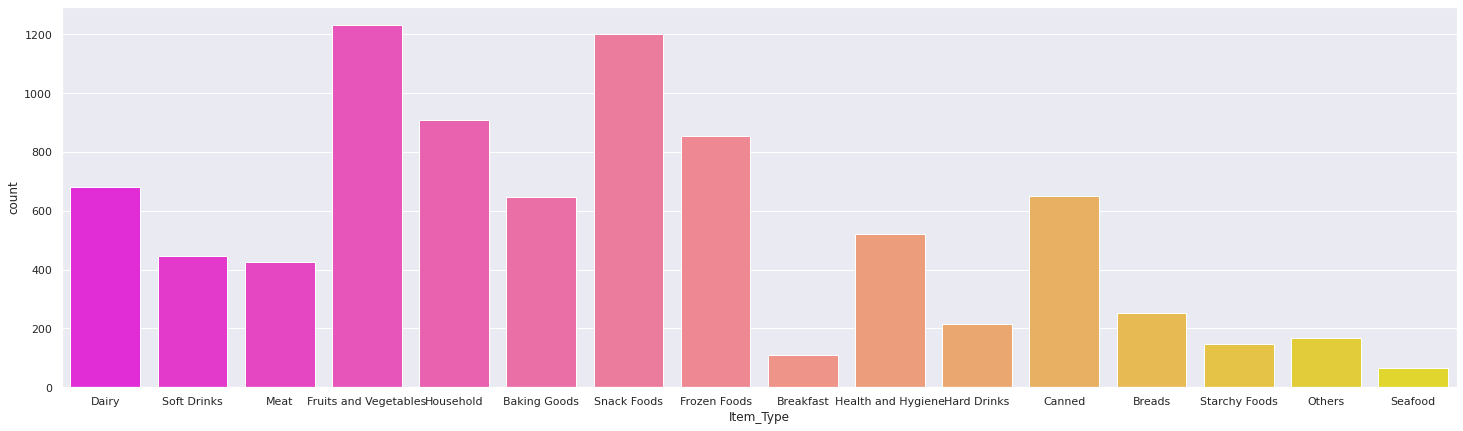

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,palette='spring')

Observations:
Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
Snack Foods too have good sales.

### 3. Outlet Size

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


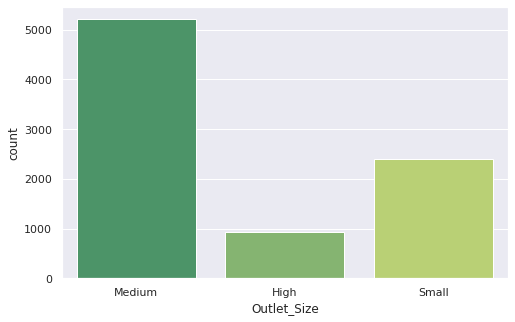

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='summer')

Observations:
The Outlets are more of Medium Size

### 4. Outlet Location Type

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


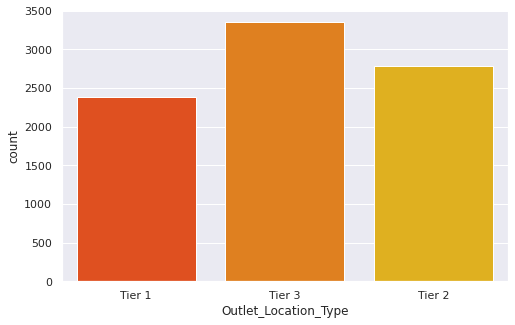

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

Observations:
The Outlets are maximum in number in Tier 3 Cities.

### 5. Outlet Type

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


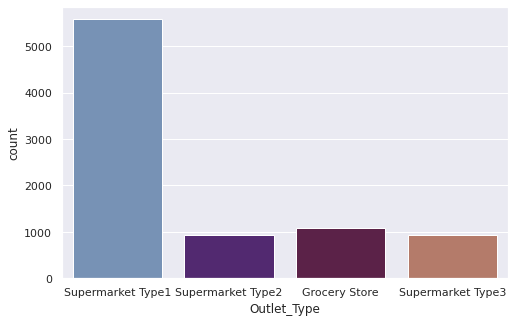

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='twilight')

Observations:
The Outlets are more of Supermarket Type1.

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


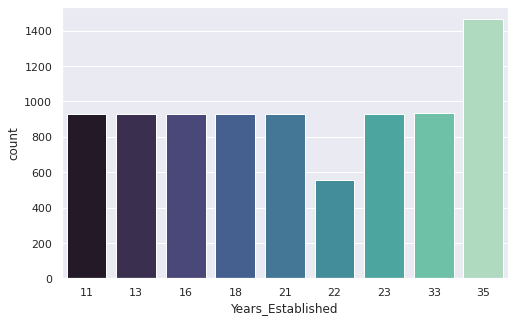

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Years_Established',data=train,palette='mako')

Observations:
The Outlets are more of established and running from 35 years.

## Bivariate Analysis

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

### 1.  Item Fat Content

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


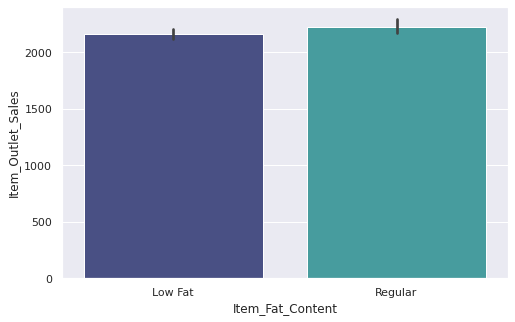

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,palette='mako')

Observations:
The Item Outlet sales are high for both Low Fat and Regular Item types

### 2. Item Visibility

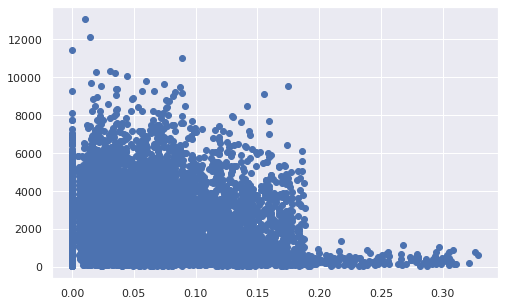

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train)

Observations:
Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

*Lets consider it like missing information and impute it with mean visibility of that product.*

In [ ]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

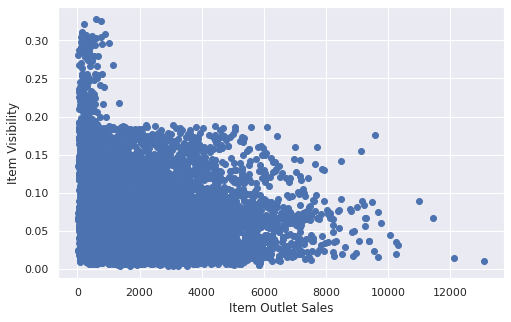

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers

### 3.  Item Type

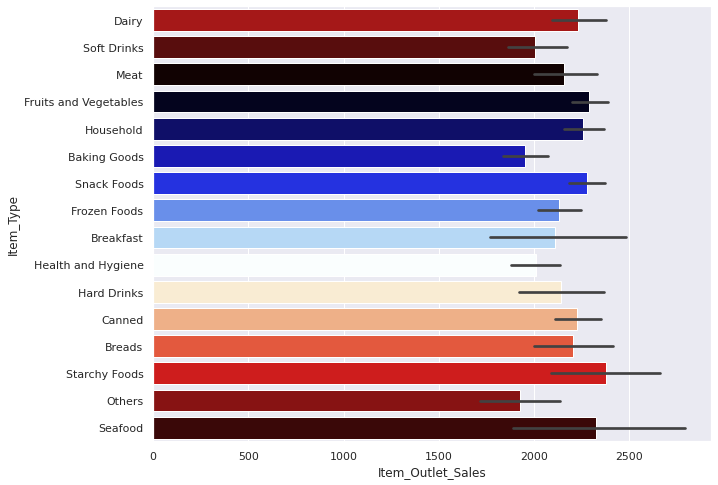

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

Observations:
The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers

Text(0, 0.5, 'Item Outlet Sales')

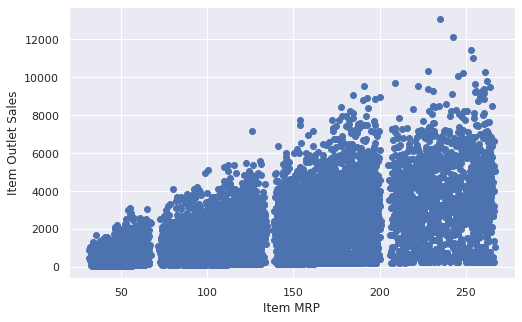

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

Observations:
Items MRP ranging from 200-250 dollars is having high Sales.

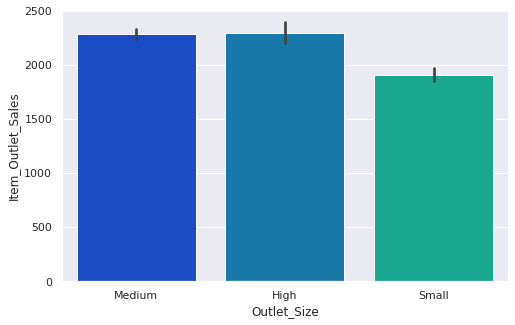

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='winter')

Observations:
The Outlet Sales is maximum for Medium and High sized Outlets.
The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

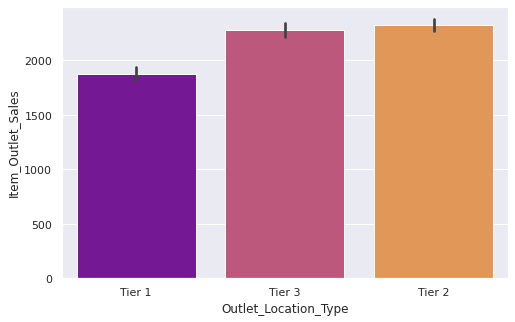

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='plasma')

Observations:
The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.

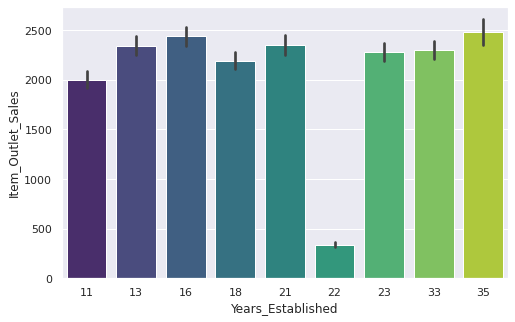

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

Observations:
It is quiet evident that Outlets established 35 years before is having good Sales margin.
We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

## Multivariate Analysis

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


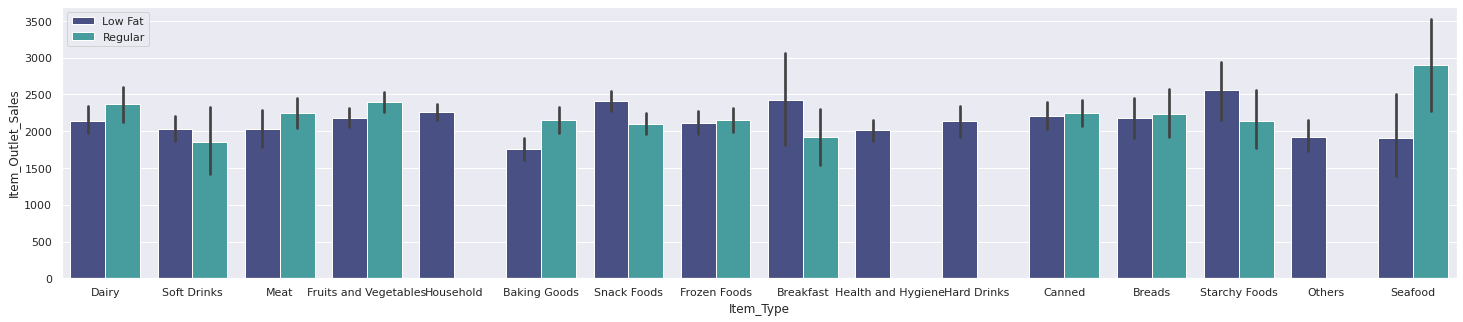

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


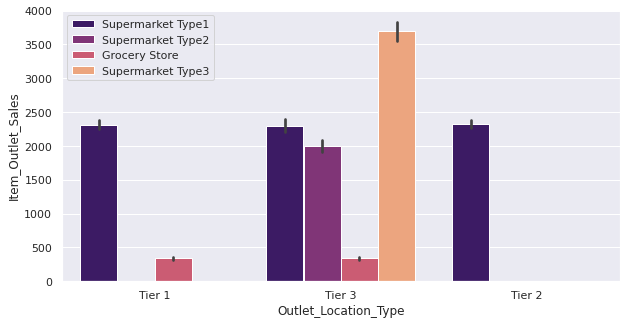

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

Observations:
The Tier-3 location type has all types of Outlet type and has high sales margin.

# Data Pra-processing

## Feature Engineering

There are some columns that needs to be dropped as they don't seem helping our analysis.

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

In [ ]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Years_Established'],
      dtype='object')

In [ ]:
#Checking number of unique rows in each feature
train.nunique().sort_values()

Item_Fat_Content                2
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Outlet_Establishment_Year       9
Years_Established               9
Outlet_Identifier              10
Item_Type                      16
Item_Weight                   416
Item_Identifier              1559
Item_Outlet_Sales            3493
Item_MRP                     5938
Item_Visibility              7880
dtype: int64

In [ ]:
#Checking number of unique rows in each feature
test.nunique().sort_values()

Item_Fat_Content                2
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Outlet_Establishment_Year       9
Years_Established               9
Outlet_Identifier              10
Item_Type                      16
Item_Weight                   411
Item_Identifier              1543
Item_MRP                     4402
Item_Visibility              5277
dtype: int64

In [ ]:
train = pd.get_dummies(train, prefix=['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'], columns=['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Years_Established,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,21,1,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,11,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,21,1,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,22,0,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.066132,Household,53.8614,OUT013,1987,994.7052,33,1,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
test = pd.get_dummies(test, prefix=['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'], columns=['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Years_Established,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750000,0.007565,Snack Foods,107.8622,OUT049,1999,21,1,0,0,1,0,1,0,0,0,1,0,0
1,FDW14,8.300000,0.038428,Dairy,87.3198,OUT017,2007,13,0,1,0,1,0,0,1,0,0,1,0,0
2,NCN55,14.600000,0.099575,Others,241.7538,OUT010,1998,22,1,0,0,1,0,0,0,1,1,0,0,0
3,FDQ58,7.315000,0.015388,Snack Foods,155.0340,OUT017,2007,13,1,0,0,1,0,0,1,0,0,1,0,0
4,FDY38,12.695633,0.118599,Dairy,234.2300,OUT027,1985,35,0,1,0,1,0,0,0,1,0,0,0,1


In [ ]:
# use label encoding for 'Item_Type' as they have value < 5
le = LabelEncoder()
var_mod = ['Item_Type']

for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [ ]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [ ]:
train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Years_Established,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,3735.1380,21,1,0,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,14,48.2692,443.4228,11,0,1,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,10,141.6180,2097.2700,21,1,0,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,6,182.0950,732.3800,22,0,1,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066132,9,53.8614,994.7052,33,1,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Years_Established,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,13,107.8622,21,1,0,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,4,87.3198,13,0,1,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,11,241.7538,22,1,0,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,13,155.0340,13,1,0,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,4,234.2300,35,0,1,0,1,0,0,0,1,0,0,0,1


## Feature Scalling

In [ ]:
std_scale = StandardScaler()
scaled_train = std_scale.fit_transform(train)
scaled_test = std_scale.fit_transform(train)

In [ ]:
scaled_train

array([[-0.84187169, -1.11135787, -0.76647929, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.64170589, -1.04506727,  1.6089627 , ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.09855449, -1.09673346,  0.6587859 , ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.53424315, -0.71867224,  0.1836975 , ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.33644372,  1.53896846,  1.3714185 , ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.45963367, -0.51981553,  1.6089627 , ...,  0.72680189,
        -0.34955064, -0.35102831]])

In [ ]:
scaled_test

array([[-0.84187169, -1.11135787, -0.76647929, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.64170589, -1.04506727,  1.6089627 , ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.09855449, -1.09673346,  0.6587859 , ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.53424315, -0.71867224,  0.1836975 , ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.33644372,  1.53896846,  1.3714185 , ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.45963367, -0.51981553,  1.6089627 , ...,  0.72680189,
        -0.34955064, -0.35102831]])

### Check Multicolliniarity

#### Train

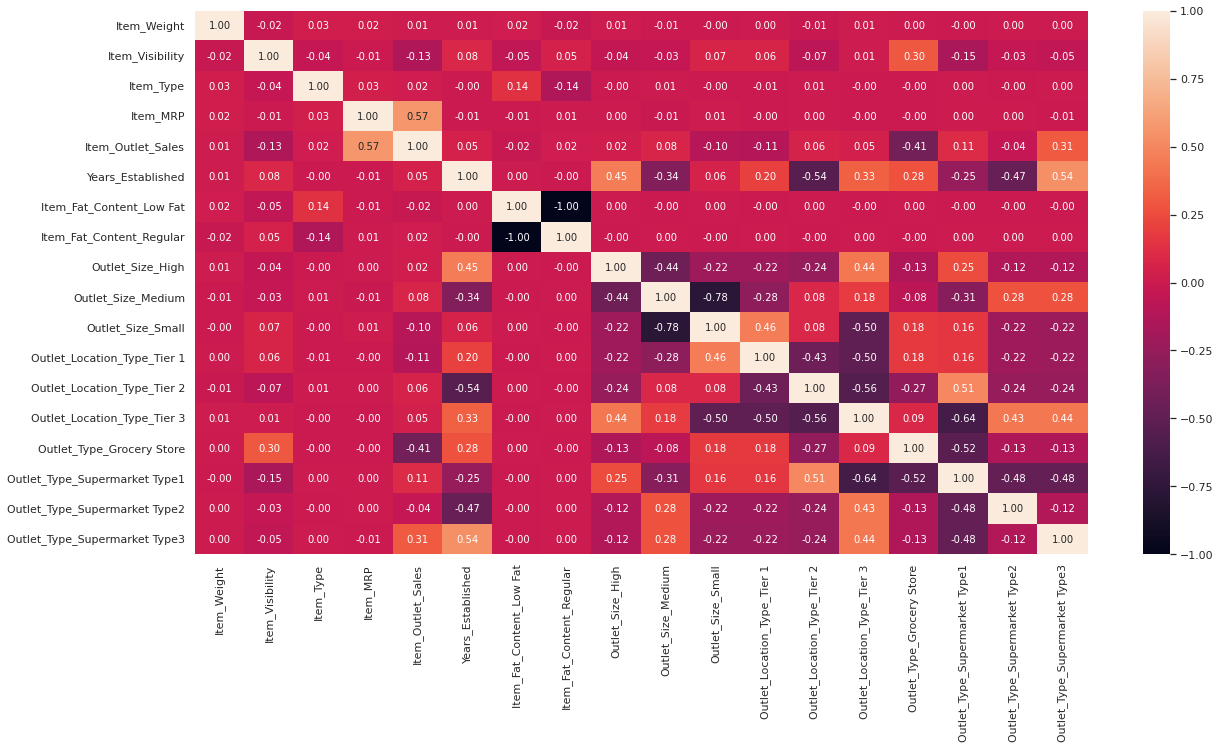

In [ ]:
plt.figure(figsize=(20,10))
correlation = train.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [ ]:
sm_train = train.corr(method='spearman')
sm_train.style.applymap(lambda x: "background-color: red" if x>0.7 else "background-color: white")

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Years_Established,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000,-0.017369,0.025310,0.026278,0.013125,0.023220,0.018547,-0.018547,0.007930,-0.006033,0.001040,0.006133,-0.020957,0.014485,0.009841,-0.016626,-0.003937,0.018738
Item_Visibility,-0.017369,1.000000,-0.049558,0.001979,-0.120399,0.057261,-0.056947,0.056947,-0.032389,-0.021593,0.045955,0.041199,-0.049960,0.010096,0.212302,-0.108531,-0.020825,-0.040333
Item_Type,0.025310,-0.049558,1.000000,0.037584,0.019747,-0.004334,0.155922,-0.155922,-0.002945,0.007813,-0.006437,-0.007202,0.005904,0.000952,-0.001846,-0.000132,-0.001474,0.003636
Item_MRP,0.026278,0.001979,0.037584,1.000000,0.562986,-0.003782,-0.006691,0.006691,0.001054,-0.009935,0.010056,-0.001723,0.001822,-0.000166,-0.002216,0.002772,0.003489,-0.005333
Item_Outlet_Sales,0.013125,-0.120399,0.019747,0.562986,1.000000,-0.042947,-0.018787,0.018787,0.047451,0.066947,-0.105670,-0.119286,0.108938,0.005067,-0.534535,0.208240,-0.016072,0.268777
Years_Established,0.023220,0.057261,-0.004334,-0.003782,-0.042947,1.000000,0.002552,-0.002552,0.334603,-0.348172,0.145543,0.330464,-0.553614,0.227779,0.321568,-0.202617,-0.543447,0.507302
Item_Fat_Content_Low Fat,0.018547,-0.056947,0.155922,-0.006691,-0.018787,0.002552,1.000000,-1.000000,0.002132,-0.003495,0.002313,-0.003155,0.003272,-0.000241,0.002924,-0.000533,-0.002129,-0.000183
Item_Fat_Content_Regular,-0.018547,0.056947,-0.155922,0.006691,0.018787,-0.002552,-1.000000,1.000000,-0.002132,0.003495,-0.002313,0.003155,-0.003272,0.000241,-0.002924,0.000533,0.002129,0.000183
Outlet_Size_High,0.007930,-0.032389,-0.002945,0.001054,0.047451,0.334603,0.002132,-0.002132,1.000000,-0.438648,-0.218609,-0.218609,-0.244113,0.435419,-0.133686,0.254668,-0.122481,-0.122999
Outlet_Size_Medium,-0.006033,-0.021593,0.007813,-0.009935,0.066947,-0.348172,-0.003495,0.003495,-0.438648,1.000000,-0.781030,-0.282771,0.079437,0.183714,-0.076675,-0.313450,0.279224,0.280404


#### Test

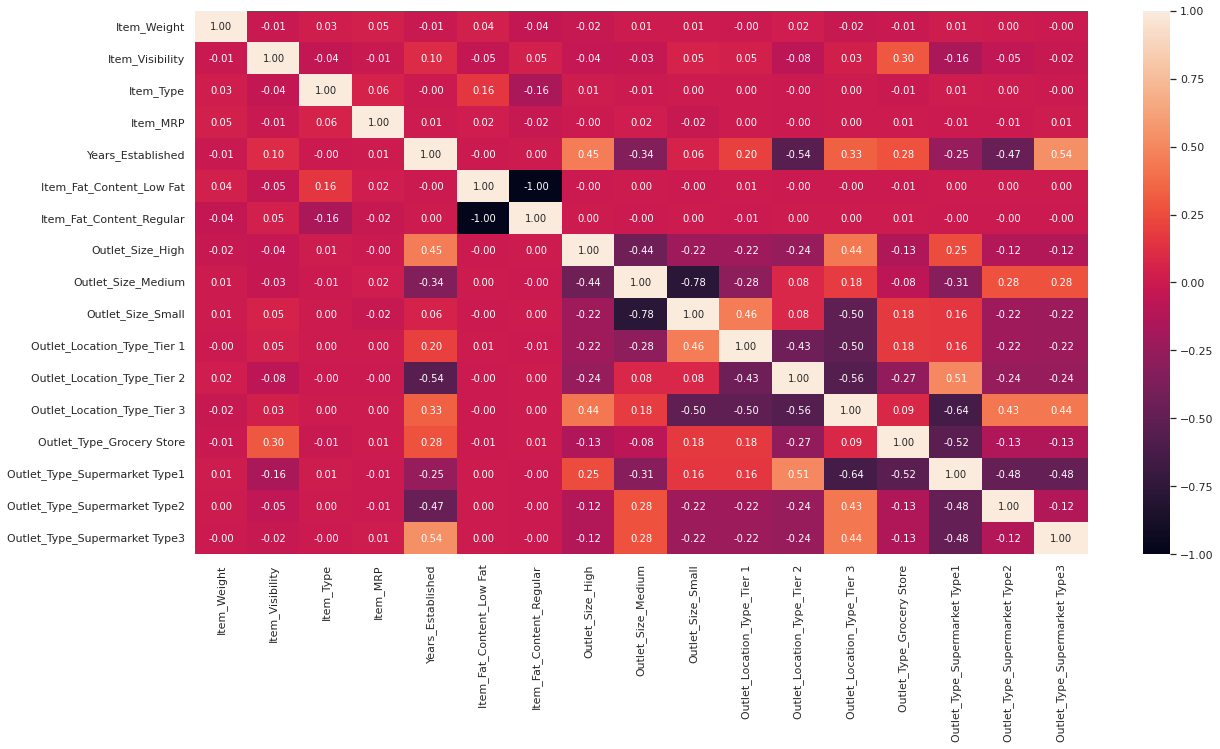

In [ ]:
plt.figure(figsize=(20,10))
correlation = test.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [ ]:
sm_test = test.corr(method='spearman')
sm_test.style.applymap(lambda x: "background-color: red" if x>0.7 else "background-color: white")

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Years_Established,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000,-0.010411,0.030066,0.045227,0.007037,0.042752,-0.042752,-0.023461,0.006880,0.008829,0.000586,0.011580,-0.011659,-0.000484,-0.011343,-0.003613,0.021367
Item_Visibility,-0.010411,1.000000,-0.058677,-0.004434,0.088543,-0.044916,0.044916,-0.021986,-0.019549,0.036501,0.033783,-0.056197,0.022899,0.217789,-0.115768,-0.042949,-0.013137
Item_Type,0.030066,-0.058677,1.000000,0.067172,-0.001069,0.177746,-0.177746,0.007933,-0.008144,0.003331,0.002124,-0.002546,0.000492,-0.013518,0.009373,0.003319,-0.003163
Item_MRP,0.045227,-0.004434,0.067172,1.000000,0.005646,0.020798,-0.020798,0.000042,0.016287,-0.017714,0.000978,-0.004272,0.003204,0.004186,-0.004979,-0.005324,0.008416
Years_Established,0.007037,0.088543,-0.001069,0.005646,1.000000,-0.003461,0.003461,0.334380,-0.347793,0.145317,0.330245,-0.553852,0.228167,0.321463,-0.203189,-0.543234,0.507568
Item_Fat_Content_Low Fat,0.042752,-0.044916,0.177746,0.020798,-0.003461,1.000000,-1.000000,-0.003486,0.003658,-0.001551,0.007463,-0.004195,-0.002834,-0.006814,0.003156,0.002342,0.000127
Item_Fat_Content_Regular,-0.042752,0.044916,-0.177746,-0.020798,0.003461,-1.000000,1.000000,0.003486,-0.003658,0.001551,-0.007463,0.004195,0.002834,0.006814,-0.003156,-0.002342,-0.000127
Outlet_Size_High,-0.023461,-0.021986,0.007933,0.000042,0.334380,-0.003486,0.003486,1.000000,-0.438550,-0.218592,-0.218592,-0.244030,0.435321,-0.133673,0.254651,-0.122394,-0.123060
Outlet_Size_Medium,0.006880,-0.019549,-0.008144,0.016287,-0.347793,0.003658,-0.003658,-0.438550,1.000000,-0.781109,-0.282792,0.079269,0.183911,-0.076674,-0.313506,0.279088,0.280606
Outlet_Size_Small,0.008829,0.036501,0.003331,-0.017714,0.145317,-0.001551,0.001551,-0.218592,-0.781109,1.000000,0.458926,0.083475,-0.502139,0.176125,0.163481,-0.217998,-0.219184


# Training Data

In [ ]:
#Let's have all the features in X & target in Y
X= train.drop(['Item_Outlet_Sales'],axis = 1)
y= train['Item_Outlet_Sales']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (8523, 17) (8523,) 
Training set  --->  (6818, 17) (6818,) 
Testing set   --->  (1705, 17)  (1705,)


# Building Model

In [ ]:
models = []
models.append(("LinearRegressor",LinearRegression()))
models.append(("Lasso",Lasso()))
models.append(("Ridge",Ridge()))
models.append(("DecisionTree",DecisionTreeRegressor(criterion="mse")))
models.append(("RandomForestRegressor",RandomForestRegressor(criterion="mse")))
models.append(("ExtraTreeRegressor",ExtraTreesRegressor()))
models.append(("GradientBoostingRegressor",GradientBoostingRegressor()))
models.append(("XGBoostingRegressor",xgb.XGBRegressor(seed = 20)))

In [ ]:
names = []
score = []
rmse = []
mse = []
mae = []
r2 = []
timing = []

In [ ]:
for name,model in models:
    model = model
    beg = time.time()
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    end = time.time()
    print("Model = {}".format(name))
    print("Score = {}, RMSE = {}, MSE = {}, MAE = {}, R2 = {}, Time = {}\n".format(round(model.score(X_test,y_test),4),
                                                round(np.sqrt(mean_squared_error(pred,y_test)),4),
                                                round(mean_squared_error(pred,y_test),4),
                                                round(mean_absolute_error(pred,y_test),4),
                                                round(r2_score(y_test,pred),4),(end-beg)))
    names.append(name)
    score.append(round(model.score(X_test,y_test),4))
    rmse.append(round(np.sqrt(mean_squared_error(pred,y_test)),4))
    mse.append(round(mean_squared_error(pred,y_test),4))
    mae.append(round(mean_absolute_error(pred,y_test),4))
    r2.append(round(r2_score(pred,y_test),4))
    timing.append(end-beg)

Model = LinearRegressor
Score = 0.5436, RMSE = 1187.654, MSE = 1410522.1295, MAE = 877.8107, R2 = 0.5436, Time = 0.008286237716674805

Model = Lasso
Score = 0.5433, RMSE = 1187.975, MSE = 1411284.4912, MAE = 877.9301, R2 = 0.5433, Time = 0.039067745208740234

Model = Ridge
Score = 0.5436, RMSE = 1187.6267, MSE = 1410457.1884, MAE = 877.7766, R2 = 0.5436, Time = 0.010589122772216797

Model = DecisionTree
Score = 0.1527, RMSE = 1618.1181, MSE = 2618306.3294, MAE = 1118.1074, R2 = 0.1527, Time = 0.08627629280090332



Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.


Model = RandomForestRegressor
Score = 0.5294, RMSE = 1205.9775, MSE = 1454381.8352, MAE = 842.9704, R2 = 0.5294, Time = 3.9063897132873535

Model = ExtraTreeRegressor
Score = 0.5147, RMSE = 1224.6225, MSE = 1499700.2861, MAE = 850.5858, R2 = 0.5147, Time = 4.28473687171936

Model = GradientBoostingRegressor
Score = 0.5695, RMSE = 1153.4899, MSE = 1330538.9116, MAE = 807.1067, R2 = 0.5695, Time = 2.3325839042663574

[16:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.


Model = XGBoostingRegressor
Score = 0.5704, RMSE = 1152.2682, MSE = 1327722.0147, MAE = 807.0529, R2 = 0.5704, Time = 1.2415735721588135



Interpretations:

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set

**MSE (Mean Squared Error)** represents the difference between the original and predicted values extracted by squared the average difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [ ]:
train = pd.DataFrame()
train["names"] = names
train["Score"] = score
train["time"] = time
train["rmse"] = rmse
train["mse"] = mse
train["mae"] = mae
train["r2"] = r2

In [ ]:
train = train.sort_values(by="Score",ascending=False)
fig = px.bar(train,"names","Score",color="names",title="Accuracy Score")
fig.show()

In [ ]:
train = train.sort_values(by="mae",ascending=True)
fig = px.bar(train,"names","mae",color="names",title="MAE")
fig.show()

In [ ]:
train = train.sort_values(by="mse",ascending=True)
fig = px.bar(train,"names","mse",color="names",title="MSE")
fig.show()

In [ ]:
train = train.sort_values(by="rmse",ascending=True)
fig = px.bar(train,"names","rmse",color="names",title="RMSE")
fig.show()

In [ ]:
train = train.sort_values(by="r2",ascending=True)
fig = px.bar(train,"names","r2",color="names",title="R2 Score")
fig.show()

**Gradient Boosting** is the best method to use as the smaller the value of MAE, RMSE, and MAE, the closer to the observed value is

# Model Evaluation with hyparameter tuning

In [ ]:
%%time
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[50,100,150,200],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,3,4,5],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

CPU times: user 79 µs, sys: 0 ns, total: 79 µs
Wall time: 84.6 µs


In [ ]:
%%time
search.fit(X,y)
search.best_params_

CPU times: user 15min 34s, sys: 1.32 s, total: 15min 35s
Wall time: 15min 55s


In [ ]:
search.best_score_

-1171012.5362336256

In [ ]:
search.best_estimator_


GradientBoostingRegressor(n_estimators=50, random_state=1, subsample=1)

In [ ]:
# Training the model on every parameter combination.
search_result = search
print("Best score on training data: %f using %s" % (abs(search_result.best_score_), search_result.best_params_))

Best score on training data: 1171012.536234 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 1, 'subsample': 1}


In [ ]:
GBR2=GradientBoostingRegressor(n_estimators=50,learning_rate=0.1,subsample=1,max_depth=3,random_state=1)
score=np.mean(cross_val_score(GBR2,X,y,scoring='neg_mean_squared_error',cv=5,n_jobs=1))
score

-1171012.5362336256

In [ ]:
columns = [f"param_{name}" for name in search_grid.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_learning_rate,param_max_depth,param_subsample,param_random_state,mean_test_error,std_test_error
146,50,0.1,3,1,1,1.171013e+06,20983.056650
137,100,0.1,2,1,1,1.171227e+06,21983.805528
145,50,0.1,3,0.75,1,1.171281e+06,23839.983193
134,50,0.1,2,1,1,1.173291e+06,30934.117549
132,50,0.1,2,0.5,1,1.173336e+06,26795.743254
...,...,...,...,...,...,...,...
14,50,0.001,2,1,1,2.793219e+06,121917.567152
13,50,0.001,2,0.75,1,2.793262e+06,121990.711817
0,50,0.001,1,0.5,1,2.847102e+06,123658.206967
1,50,0.001,1,0.75,1,2.847406e+06,123533.020443


In [ ]:
error = -search.score(X_test, y_test)
print(f"On average, our GBDT regressor makes an error of {error:.2f}")

On average, our GBDT regressor makes an error of 1254238.18


In [ ]:
%%time
search.fit(X_train, y_train)
y_predic = search.predict(X_test)

method = str(type(search)).split('.')[-1][:-2]

# MAE score

mae = mean_absolute_error(y_test, y_predic)
print('Mean Absolute Error : ',mae)

# MSE score
mse = mean_squared_error(y_test, y_predic)
print('Mean Squared Error : ',mse)

#RMSE Score
rmse_value = np.sqrt(mean_squared_error(y_test, y_predic))
print('Root Mean Squared Error : ',rmse_value)

#R2 Score
r2 = r2_score(y_test, y_predic)
print('R2 Score : ',r2)

Mean Absolute Error :  806.084918913243
Mean Squared Error :  1317293.7576619748
Root Mean Squared Error :  1147.7341842351716
R2 Score :  0.573736021563927
CPU times: user 12min 32s, sys: 1.14 s, total: 12min 33s
Wall time: 12min 42s


# Model Evaluation

In [ ]:
bigmart_exp = dx.Explainer(search, X_train, y_train, label = "GBR Interpretation")

Preparation of a new explainer is initiated

  -> data              : 6818 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 6818 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : GBR Interpretation
  -> predict function  : <function yhat_default at 0x7f03e53e8170> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 57.5, mean = 2.17e+03, max = 7.28e+03
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -4.56e+03, mean = -1.35, max = 5.81e+03
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



In [ ]:
# visualize permutation feature importance for Gradient Boosting Regressor
bigmart_exp.model_parts().plot()

In [ ]:
bigmart_GBR = bigmart_exp.model_parts()
bigmart_GBR.result

,variable,dropout_loss,label
0,Item_Fat_Content_Low Fat,1045.779502,GBR Interpretation
1,Outlet_Location_Type_Tier 3,1045.779502,GBR Interpretation
2,Outlet_Location_Type_Tier 1,1045.779502,GBR Interpretation
3,_full_model_,1045.779502,GBR Interpretation
4,Item_Fat_Content_Regular,1045.779502,GBR Interpretation
5,Outlet_Size_Small,1045.791796,GBR Interpretation
6,Outlet_Location_Type_Tier 2,1045.895887,GBR Interpretation
7,Outlet_Size_Medium,1045.918275,GBR Interpretation
8,Outlet_Size_High,1046.114904,GBR Interpretation
9,Item_Type,1046.661891,GBR Interpretation


In [ ]:
# create partial dependence plot of Gradient Boosting Regressor model
bigmart_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 17/17 [00:00<00:00, 35.67it/s]


#Conclusion

1. Item MRP clearly increases Outlet sales.
2. The largest location didn't garner biggest sales. In fact, it grew from a medium-sized store; Groceries and Supermarket Type 3.
3. Years in business will also have loyal customers, which will boost the sales margin.

# Recommendation

The prediction results show the correlation between the various attributes labeled and how a specific medium-sized location recorded the highest sales, implying that other shopping locations should follow similar patterns for increased sales. Such as more locations should be switched or shifted to Supermarket Type3 to increase the sales of products at Big Mart or membership discount could help encourage customer loyalty.